# Kmeans

## 1. What does Kmeans do?

- K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). 
- The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. 
- The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided.
- Data points are clustered based on feature similarity. 
- The results of the K-means clustering algorithm are:


    - The centroids of the K clusters, which can be used to label new data
    - Labels for the training data (each data point is assigned to a single cluster)
    
![kmeans](../data/kmeans.png)

## 2. Working

- It begins with choosing the number of K clusters. 
- The K signifies the number of clusters that the algorithm would find in the dataset. 
- Now choosing the right K is very important. 
- Sometimes the K is clearly visible from the dataset when visualized. 
- However most of the times this is not the case and in a short time we'll see about how to choose the right K value.

![kmeans1](../data/kmeans2.png)

- The second step is to allocate K random points as centroids. 
- These K points could be points from the dataset or outside. 
- There's one thing to note however. 
- The random initialisation of centroids can sometimes cause random initialisation trap which we would see in this section soon.

![kmeans1](../data/kmeans3.png)

![kmeans1](../data/kmeans4.png)

![kmeans1](../data/kmeans5.png)

![kmeans1](../data/kmeans6.png)

![kmeans1](../data/kmeans7.png)

## 3. Choosing the right K

- The way to evaluate the choice of K is made using a parameter known as WCSS. 
- WCSS stands for Within Cluster Sum of Squares. 

- It should be low. 

- Here's the formula representation for example when K = 3

- Summation Distance(p,c) is the sum of distance of points in a cluster from the centroid.

![kmeans1](../data/kmeans8.png)


- The Elbow Method is then used to choose the best K value. 
- In the depiction below we can see that after 3 there's no significant decrease in WCSS so 3 is the best here. 
- Therefore there's an elbow shape that forms and it is usually a good idea to pick the number where this elbow is formed. 
- There would be many times when the graph wouldn't be this intuitive but with practice it becomes easier.

![kmeans1](../data/kmeans9.png)

## 4. Centroid Random Initialisation Trap

Through these images let's see how two different random initialisations can cause a totally different outcome.

![kmeans1](../data/kmeans10.png)

## 5. Implementation

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

dataset = pd.read_csv('../data/Mall_Customers.csv',index_col='CustomerID')

In [13]:
dataset.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [4]:
dataset.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [5]:
dataset.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [6]:
dataset.drop_duplicates(inplace=True)

In [7]:
# using only Spending_Score and income variable for easy visualisation
X = dataset.iloc[:, [2, 3]].values

In [8]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

/home/kissami/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


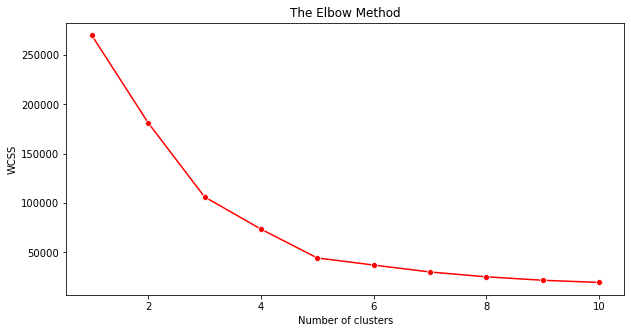

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## 6. Visualisation

/home/kissami/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/kissami/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/kissami/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.w

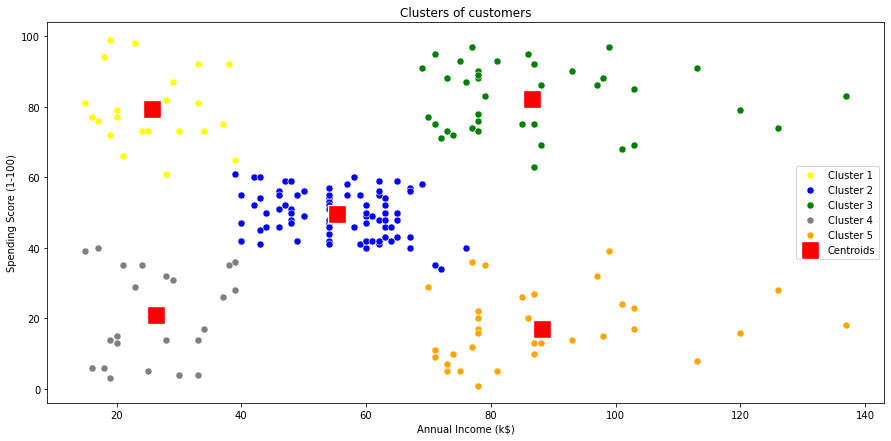

In [11]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()